In [1]:
import numpy as np
import pandas as pd
import visuals as vs
from time import time
from IPython.display import display
%matplotlib inline

data=pd.read_csv("census.csv")
display(data.head(n=3))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


In [6]:
#total number of records
n_records=data.shape[0]

#Total records with income >=50K
n_greater_50k=len(data[data.income==">50K"])

#total records with income <50K
n_at_most_50k=len(data[data.income=="<=50K"])

#=percentage of individuals whose income is more than $50000
greater_percent= n_greater_50k/n_records *100

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals making more than $50,000: {}".format(n_greater_50k))
print ("Individuals making at most $50,000: {}".format(n_at_most_50k))
print ("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


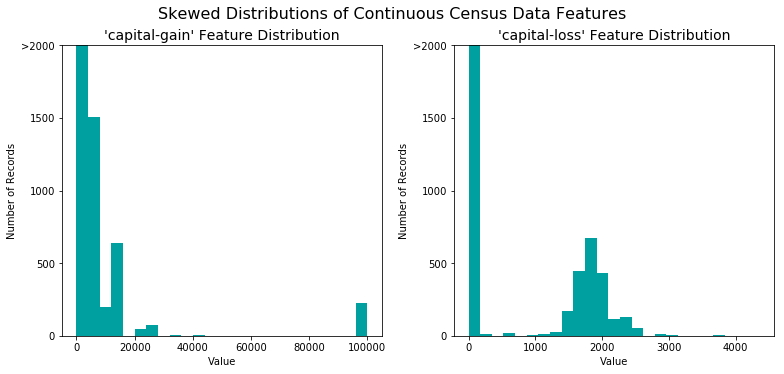

In [7]:
#split the data into features and target label
income_raw =data['income']
features_raw=  data.drop ('income', axis=1)

vs.distribution(data)

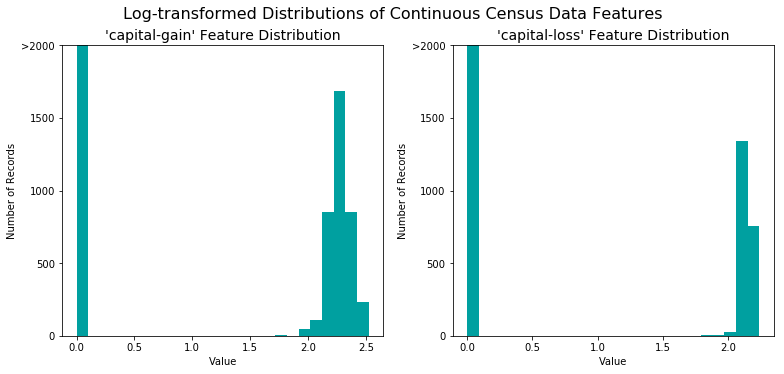

In [29]:
#since these features like capital gain and capital loss are skewed, we will use use logarithms for transforming
skewed=['capital-gain','capital-loss']
features_log_transformed=pd.DataFrame(data=features_raw)
features_log_transformed[skewed]=features_raw[skewed].apply(lambda x: np.log(1+x))
vs.distribution(features_log_transformed, transformed=True)

In [32]:
#normalizing all the continuous features like capital-gain
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
numerical=['age','education-num','capital-gain','capital-loss','hours-per-week']
features_log_minmax_transform=pd.DataFrame(data=features_log_transformed)
features_log_minmax_transform[numerical]=scaler.fit_transform(features_log_transformed[numerical])

display(features_log_minmax_transform.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.855471,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [37]:
#one hot encode categorical features
features_final=pd.get_dummies(features_raw)

income=income_raw.replace(['<=50K','>50K'],[0,1])

encoded=list(features_final.columns)
print(" {} total features after one-hot encoding.".format(len(encoded)))

display(encoded)

 103 total features after one-hot encoding.


['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_level_ 10th',
 'education_level_ 11th',
 'education_level_ 12th',
 'education_level_ 1st-4th',
 'education_level_ 5th-6th',
 'education_level_ 7th-8th',
 'education_level_ 9th',
 'education_level_ Assoc-acdm',
 'education_level_ Assoc-voc',
 'education_level_ Bachelors',
 'education_level_ Doctorate',
 'education_level_ HS-grad',
 'education_level_ Masters',
 'education_level_ Preschool',
 'education_level_ Prof-school',
 'education_level_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ Adm-cleri

In [42]:
#split the data into training and testing sets
from sklearn.cross_validation import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features_final,income,test_size=0.2, random_state= 0)

print("Training sets has {}samples".format(features_train.shape[0]))
print("Test set has {} samples.".format(features_test.shape[0]))


Training sets has 36177samples
Test set has 9045 samples.
